# Word Model

### Installation and set up

In [3]:
!pip install lavague

import os
# Check if running in Google Colab
try:
    from google.colab import userdata
    IN_COLAB = True
except ImportError:
    IN_COLAB = False

if IN_COLAB:
    os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
else:
    os.environ["OPENAI_API_KEY"] = os.getenv('OPENAI_API_KEY')

  Using cached lavague-1.1.19-py3-none-any.whl.metadata (8.6 kB)
  Using cached lavague_contexts_openai-0.2.4-py3-none-any.whl.metadata (1.5 kB)
  Using cached lavague_core-0.2.32-py3-none-any.whl.metadata (1.5 kB)
  Using cached lavague_drivers_selenium-0.2.12-py3-none-any.whl.metadata (1.2 kB)
  Using cached lavague_gradio-0.2.8-py3-none-any.whl.metadata (1.1 kB)
  Using cached llama_index_embeddings_azure_openai-0.1.11-py3-none-any.whl.metadata (804 bytes)
  Using cached llama_index_embeddings_openai-0.1.11-py3-none-any.whl.metadata (655 bytes)
  Using cached llama_index_llms_azure_openai-0.1.10-py3-none-any.whl.metadata (787 bytes)
  Using cached llama_index_llms_openai-0.1.27-py3-none-any.whl.metadata (610 bytes)
  Using cached llama_index_multi_modal_llms_azure_openai-0.1.4-py3-none-any.whl.metadata (820 bytes)
  Using cached llama_index_multi_modal_llms_openai-0.1.8-py3-none-any.whl.metadata (728 bytes)
  Using cached llama_index_core-0.10.61-py3-none-any.whl.metadata (2.4 kB)
 

### Instantiate a Word Model

In [4]:
from lavague.core import  WorldModel

world_model = WorldModel()

[nltk_data] Downloading package stopwords to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     /usr/local/lib/python3.10/dist-
[nltk_data]     packages/llama_index/legacy/_static/nltk_cache...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/lavague/core/__init__.py:21: UserWarning: Telemetry is turned on. To turn off telemetry, set your LAVAGUE_TELEMETRY to 'NONE'
  warnings.warn(warning_message, UserWarning)


### Generate observations

In [5]:
from lavague.drivers.selenium import SeleniumDriver
from lavague.core.memory import ShortTermMemory

selenium_driver = SeleniumDriver(headless=True, url="https://huggingface.co/")
st_memory = ShortTermMemory()

# Generate observations & set objective
objective = "Go on the quicktour of PEFT"
current_state, past = st_memory.get_state()
obs = selenium_driver.get_obs()

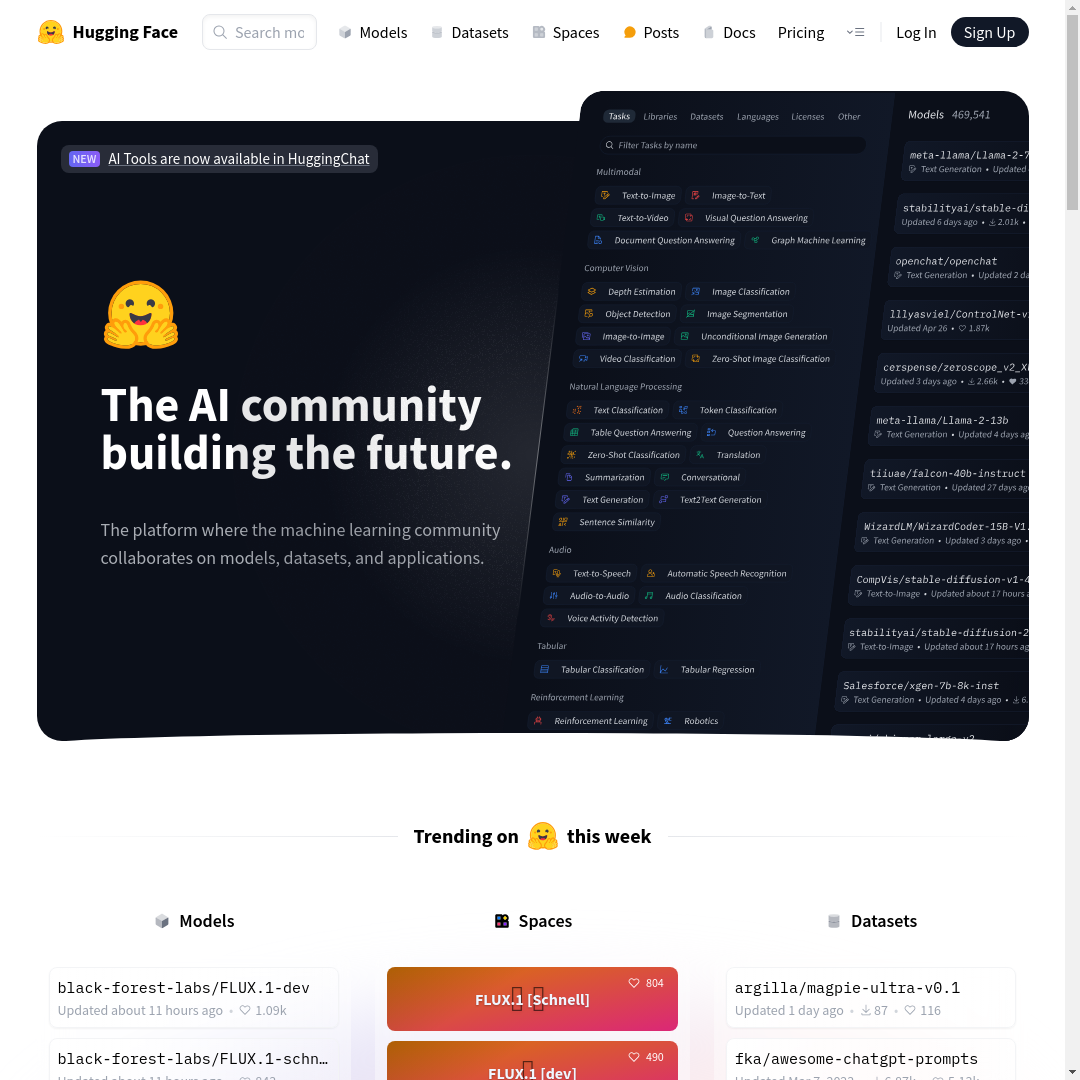

In [6]:
from lavague.core.logger import load_images_from_folder
from IPython.display import display

images = load_images_from_folder(obs["screenshots_path"])
display(images[0])

In [7]:
print("Objective: ", objective)
print("Current State: ", current_state)
print("Past: ", past)
print("Observations: ", obs)

Objective:  Go on the quicktour of PEFT
Current State:  {'external_observations': {'vision': '[SCREENSHOT]'}, 'internal_state': {'user_inputs': [], 'agent_outputs': []}}
Past:  {'previous_instructions': '[NONE]', 'last_engine': '[NONE]'}
Observations:  {'html': '<html class=""><head>\n\t\t<meta charset="utf-8">\n\t\t<meta name="viewport" content="width=device-width, initial-scale=1.0, user-scalable=no">\n\t\t<meta name="description" content="We’re on a journey to advance and democratize artificial intelligence through open source and open science.">\n\t\t<meta property="fb:app_id" content="1321688464574422">\n\t\t<meta name="twitter:card" content="summary_large_image">\n\t\t<meta name="twitter:site" content="@huggingface">\n\t\t<meta property="og:title" content="Hugging Face – The AI community building the future.">\n\t\t<meta property="og:type" content="website">\n\t\t<meta property="og:url" content="https://huggingface.co/">\n\t\t<meta property="og:image" content="https://huggingface

### Get next instruction

In [8]:
world_model_output = world_model.get_instruction(
    objective, current_state, past, obs
)

print(world_model_output)

Thoughts:
- The current screenshot shows the homepage of Hugging Face.
- The objective is to go on the quicktour of PEFT.
- There is no direct link or mention of PEFT visible in the current screenshot.
- The next step should involve navigating to a section where PEFT might be found, such as the 'Docs' or 'Models' section.

Next engine: Navigation Engine
Instruction: Click on 'Docs' in the menu.


In [9]:
from lavague.core.utilities.format_utils import (
    extract_next_engine,
    extract_world_model_instruction,
)

next_engine_name = extract_next_engine(world_model_output)
instruction = extract_world_model_instruction(world_model_output)

print(next_engine_name)
print(instruction)

Navigation Engine
Click on 'Docs' in the menu.


### Understanding the World Moel prompt

In [10]:
from lavague.core.world_model import WORLD_MODEL_PROMPT_TEMPLATE

print(WORLD_MODEL_PROMPT_TEMPLATE.template)


You are an AI system specialized in high level reasoning. Your goal is to generate instructions for other specialized AIs to perform web actions to reach objectives given by humans.
Your inputs are:
- objective ('str'): a high level description of the goal to achieve.
- previous_instructions ('str'): a list of previous steps taken to reach the objective.
- last_engine ('str'): the engine used in the previous step.
- current_state ('dict'): the state of the environment in YAML to use to perform the next step.

Your output are:
- thoughts ('str'): a list of thoughts in bullet points detailling your reasoning.
- next_engine ('str'): the engine to use for the next step.
- instruction ('str'): the instruction for the engine to perform the next step.

Here are the engines at your disposal:
- Python Engine: This engine is used when the task requires doing computing using the current state of the agent.
It does not impact the outside world and does not navigate.
- Navigation Engine: This engi

In [11]:
from lavague.core.world_model import WORLD_MODEL_GENERAL_EXAMPLES

print(WORLD_MODEL_GENERAL_EXAMPLES)


Objective:  Go to the first issue you can find
Previous instructions:
- Click on 'Issues' with the number '28' next to it.
- [FAILED] Click on 'Build and share place where people can suggest their use cases and results #225'
- [FAILED] Click on 'Build and share place where people can suggest their use cases and results #225'
Last engine: Navigation Engine
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
  agent_outputs: []
  user_inputs: []
Tabs opened:
0 - [CURRENT] lavague-ai/LaVague - Issues

Thoughts:
- The current screenshot shows the issues page of the GitHub repository 'lavague-ai/LaVague'.
- The objective is to go to the first issue.
- Previous instructions have been unsuccessful. A new approach should be used.
- The '#225' seems not to be clickable and it might be relevant to devise an instruction that does not include it.
Next engine: Navigation Engine
Instruction: Click on the first issue, with title 'Build and share place where people can sugg

### Modifying the prompt

In [13]:
extra_knowledge = """
Objective: Find the latest papers on Fine tuning
Previous instructions:
- SCAN
- Click on 'Previous'
Last engine: [NONE]
Current state:
external_observations:
  vision: '[SCREENSHOT]'
internal_state:
    agent_outputs: []
    user_inputs: []

Thoughts:
- The current screenshot shows the top of a page showing papers papers published on the 22nd May 2024 on Hugging Face.
- The objective is to find the latest papers on Fine tuning.
- As we need to find the latest papers, the best next step is to gather more information to see if this page contains the information we need.
- The best next step is to use the Navigation Controls to take a screenshot of the whole page to find the latest papers on Fine tuning.
Next engine: Navigation Controls
Instruction: SCAN
"""

# save extra knowledge to a file
file_path = "knowledge.txt"

with open(file_path, "w") as file:
    file.write(extra_knowledge)

# Import extra knowledge from file
world_model.add_knowledge(file_path=file_path)

In [14]:
# Replace examples with your own ones

new_examples = "[YOUR_EXAMPLES_HERE]"
world_model = WorldModel(examples=new_examples)